#Extracting the dataset

In [ ]:
!unzip human+activity+recognition+using+smartphones.zip

Archive:  human+activity+recognition+using+smartphones.zip
 extracting: UCI HAR Dataset.names   
 extracting: UCI HAR Dataset.zip     


In [ ]:
!unzip UCI\ HAR\ Dataset.zip

Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: UCI HAR Dataset/README.txt  
  inflating: __MACOSX/UCI HAR Dataset/._README.txt  
   creating: UCI HAR Dataset/test/
   creating: UCI HAR Dataset/test/Inertial Signals/
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
   creating: __MACOSX/UCI HAR Dataset/test/
   creating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/
  inflating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_acc_x_test.txt  
  inflating: UCI HAR

#Importing the Libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.interpolate import interp1d
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPooling1D, Reshape, Activation, Flatten
from keras.layers import Conv1D, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping

import tensorflow as tf
from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#Loading the Dataset

In [ ]:
# Define file paths
data_path = "/content/UCI HAR Dataset/train/Inertial Signals/"
files = [
    "body_acc_x_train.txt", "body_acc_y_train.txt", "body_acc_z_train.txt",
    "body_gyro_x_train.txt", "body_gyro_y_train.txt", "body_gyro_z_train.txt",
    "total_acc_x_train.txt", "total_acc_y_train.txt", "total_acc_z_train.txt"
]

# Load activity labels
y_train = np.loadtxt("/content/UCI HAR Dataset/train/y_train.txt", dtype=int)

body_acc_x_train = pd.read_csv(data_path + files[0], delim_whitespace=True, header=None)
body_acc_y_train = pd.read_csv(data_path + files[1], delim_whitespace=True, header=None)
body_acc_z_train = pd.read_csv(data_path + files[2], delim_whitespace=True, header=None)
body_gyro_x_train = pd.read_csv(data_path + files[3], delim_whitespace=True, header=None)
body_gyro_y_train = pd.read_csv(data_path + files[4], delim_whitespace=True, header=None)
body_gyro_z_train = pd.read_csv(data_path + files[5], delim_whitespace=True, header=None)
total_acc_x_train = pd.read_csv(data_path + files[6], delim_whitespace=True, header=None)
total_acc_y_train = pd.read_csv(data_path + files[7], delim_whitespace=True, header=None)
total_acc_z_train = pd.read_csv(data_path + files[8], delim_whitespace=True, header=None)

In [ ]:
test_data_path = "/content/UCI HAR Dataset/test/Inertial Signals/"
files = [
    "body_acc_x_test.txt", "body_acc_y_test.txt", "body_acc_z_test.txt",
    "body_gyro_x_test.txt", "body_gyro_y_test.txt", "body_gyro_z_test.txt",
    "total_acc_x_test.txt", "total_acc_y_test.txt", "total_acc_z_test.txt"
]
body_acc_x_test = pd.read_csv(test_data_path + files[0], delim_whitespace=True, header=None)
body_acc_y_test = pd.read_csv(test_data_path + files[1], delim_whitespace=True, header=None)
body_acc_z_test = pd.read_csv(test_data_path + files[2], delim_whitespace=True, header=None)
body_gyro_x_test = pd.read_csv(test_data_path + files[3], delim_whitespace=True, header=None)
body_gyro_y_test = pd.read_csv(test_data_path + files[4], delim_whitespace=True, header=None)
body_gyro_z_test = pd.read_csv(test_data_path + files[5], delim_whitespace=True, header=None)
total_acc_x_test = pd.read_csv(test_data_path + files[6], delim_whitespace=True, header=None)
total_acc_y_test = pd.read_csv(test_data_path + files[7], delim_whitespace=True, header=None)
total_acc_z_test = pd.read_csv(test_data_path + files[8], delim_whitespace=True, header=None)
y_test = np.loadtxt("/content/UCI HAR Dataset/test/y_test.txt", dtype=int)
y_test = to_categorical(y_test - 1)
X_test = np.stack([total_acc_x_test, total_acc_y_test, total_acc_z_test,
                    body_acc_x_test, body_acc_y_test, body_acc_z_test,
                    body_gyro_x_test, body_gyro_y_test, body_gyro_z_test], axis=2)

In [ ]:
X_train = np.stack([total_acc_x_train, total_acc_y_train, total_acc_z_train,
                    body_acc_x_train, body_acc_y_train, body_acc_z_train,
                    body_gyro_x_train, body_gyro_y_train, body_gyro_z_train], axis=2)
X_train.shape

(7352, 128, 9)

In [ ]:
y_train = to_categorical(y_train - 1)  # Convert to one-hot encoding (as classes start from 1)
y_train.shape

(7352, 6)

#Visualizing the Data

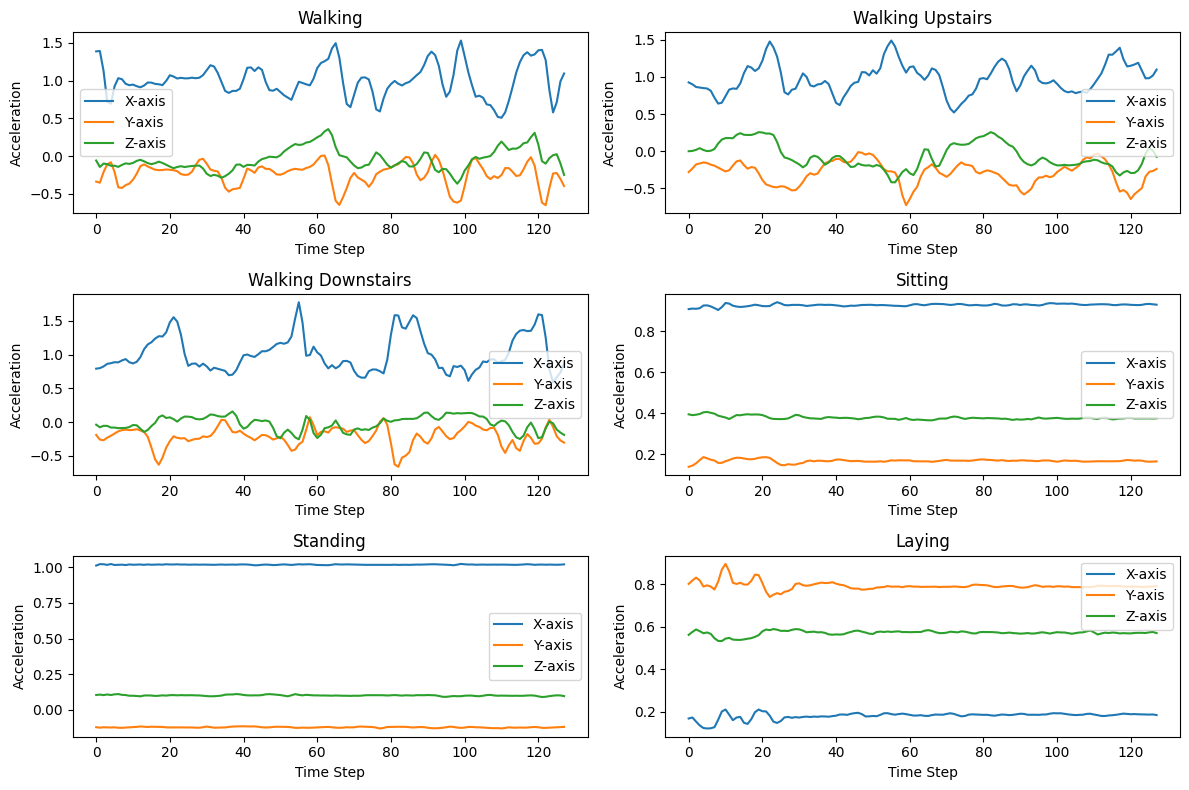

In [ ]:
# Load activity labels
y_train_graph = np.loadtxt("/content/UCI HAR Dataset/train/y_train.txt", dtype=int)

# Define activity labels
activity_labels = {
    1: "Walking",
    2: "Walking Upstairs",
    3: "Walking Downstairs",
    4: "Sitting",
    5: "Standing",
    6: "Laying"
}

# Get unique activities
unique_activities = np.unique(y_train_graph)

# Plot each activity separately
plt.figure(figsize=(12, 8))

for i, activity in enumerate(unique_activities, 1):
    plt.subplot(3, 2, i)

    # Get indices of this activity
    indices = np.where(y_train_graph == activity)[0]

    # Select the first instance of this activity
    row_index = indices[0]

    # Get corresponding acceleration values
    x_values = total_acc_x_train.iloc[row_index].values
    y_values = total_acc_y_train.iloc[row_index].values
    z_values = total_acc_z_train.iloc[row_index].values

    # Plot
    plt.plot(x_values, label="X-axis")
    plt.plot(y_values, label="Y-axis")
    plt.plot(z_values, label="Z-axis")

    plt.title(activity_labels[activity])
    plt.xlabel("Time Step")
    plt.ylabel("Acceleration")
    plt.legend()

plt.tight_layout()
plt.show()

#LSTM Model

In [ ]:
# Define LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(128, 9)),  # First LSTM Layer
    Dropout(0.3),  # Prevents overfitting
    LSTM(64, return_sequences=False),  # Second LSTM Layer
    Dropout(0.3),
    Dense(32, activation='relu'),  # Fully Connected Layer
    Dense(6, activation='softmax')  # Output Layer (6 classes)
])

# Compile the model with Adam optimizer and proper metrics
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',  # Correct loss for multi-class classification
              metrics=['accuracy',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall'),
                       tf.keras.metrics.AUC(name='auc')])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128, 128)            │          70,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,342 (477.90 KB)

 Trainable params: 122,342 (477.90 KB)

 Non-trainable params: 0 (0.00 B)

##Train the model

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 51s 245ms/step - accuracy: 0.4677 - auc: 0.8048 - loss: 1.3068 - precision: 0.8198 - recall: 0.2182 - val_accuracy: 0.6635 - val_auc: 0.9295 - val_loss: 0.8493 - val_precision: 0.7817 - val_recall: 0.5357
Epoch 2/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 79s 232ms/step - accuracy: 0.7162 - auc: 0.9552 - loss: 0.6525 - precision: 0.8090 - recall: 0.6092 - val_accuracy: 0.7430 - val_auc: 0.9531 - val_loss: 0.7054 - val_precision: 0.7802 - val_recall: 0.6975
Epoch 3/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 82s 232ms/step - accuracy: 0.8112 - auc: 0.9765 - loss: 0.4690 - precision: 0.8405 - recall: 0.7750 - val_accuracy: 0.8525 - val_auc: 0.9678 - val_loss: 0.5579 - val_precision: 0.8540 - val_recall: 0.8511
Epoch 4/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 44s 237ms/step - accuracy: 0.8816 - auc: 0.9841 - loss: 0.3589 - precision: 0.8912 - recall: 0.8690 - val_accuracy: 0.8749 - val_auc: 0.9750 - val_loss: 0.4707 - val_precision: 0.8777 - val_recall: 0.8736
Epoch 5/30
184/184 ━

##Plotting training Metrics

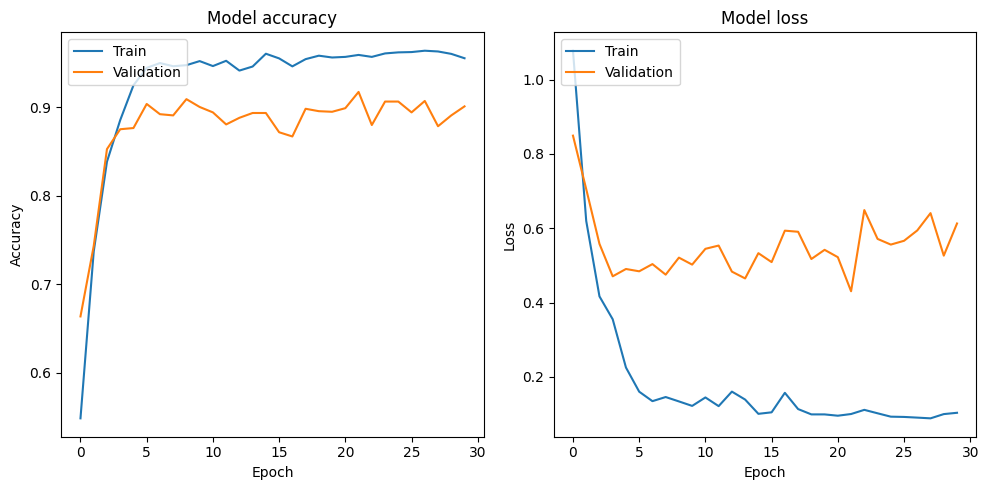

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

##Confusion Matrix

93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step


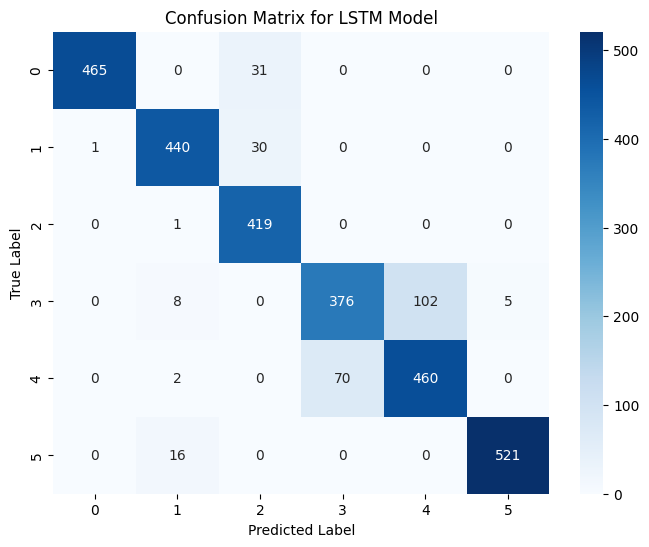

In [ ]:
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for LSTM Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##Test Accuracy

In [ ]:
test = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test[1] * 100:.4f}%")

93/93 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.8754 - auc: 0.9780 - loss: 0.4437 - precision: 0.8753 - recall: 0.8746
Test Accuracy: 90.9739%


##Saving the model

In [ ]:
model.save("lstm_model.keras")

#1D CNN Model

In [ ]:
# Define CNN model
model = Sequential([
    Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(128, 9)),  # 1st Conv Layer
    MaxPooling1D(pool_size=2),  # Downsampling
    Dropout(0.3),

    Conv1D(filters=64, kernel_size=3, activation='relu'),  # 2nd Conv Layer
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),  # Convert 1D features to a dense layer
    Dense(32, activation='relu'),  # Fully Connected Layer
    Dense(6, activation='softmax')  # Output Layer (6 classes)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall'),
                       tf.keras.metrics.AUC(name='auc')])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 124, 128)            │           5,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 62, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 62, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 60, 64)              │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │          61,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,198 (360.15 KB)

 Trainable params: 92,198 (360.15 KB)

 Non-trainable params: 0 (0.00 B)

##Train the model

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=20, batch_size=32,
                    validation_split=0.2)

Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.6317 - auc: 0.9132 - loss: 0.8550 - precision: 0.8165 - recall: 0.4766 - val_accuracy: 0.8899 - val_auc: 0.9743 - val_loss: 0.4415 - val_precision: 0.8932 - val_recall: 0.8872
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9253 - auc: 0.9952 - loss: 0.2040 - precision: 0.9295 - recall: 0.9205 - val_accuracy: 0.9035 - val_auc: 0.9735 - val_loss: 0.4079 - val_precision: 0.9041 - val_recall: 0.9035
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9455 - auc: 0.9980 - loss: 0.1324 - precision: 0.9468 - recall: 0.9446 - val_accuracy: 0.9041 - val_auc: 0.9795 - val_loss: 0.3923 - val_precision: 0.9040 - val_recall: 0.9028
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9517 - auc: 0.9984 - loss: 0.1147 - precision: 0.9534 - recall: 0.9512 - val_accuracy: 0.9103 - val_auc: 0.9810 - val_loss: 0.4125 - val_precision: 0.9102 - val_recall: 0.9096
Epoch 5/20
184/184 ━━━━━━━━

##Plotting training metrics

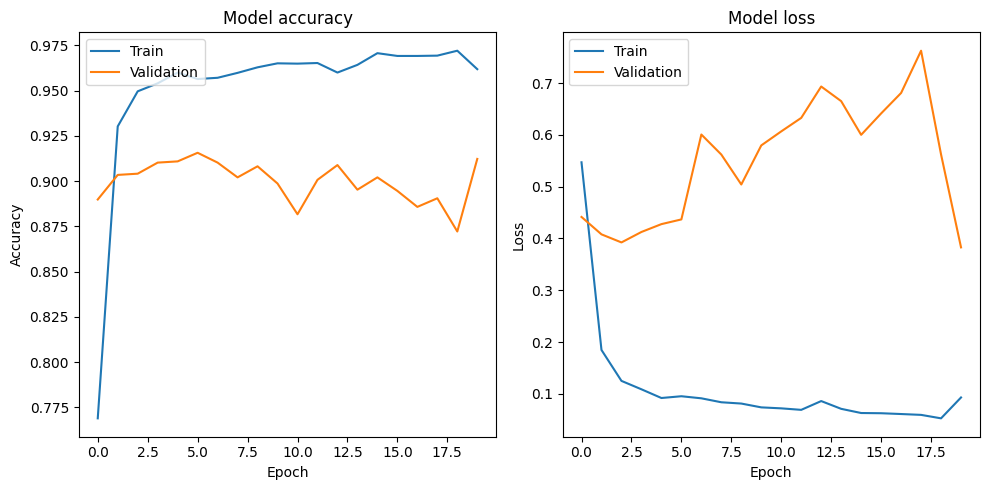

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

##Confusion matrix

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


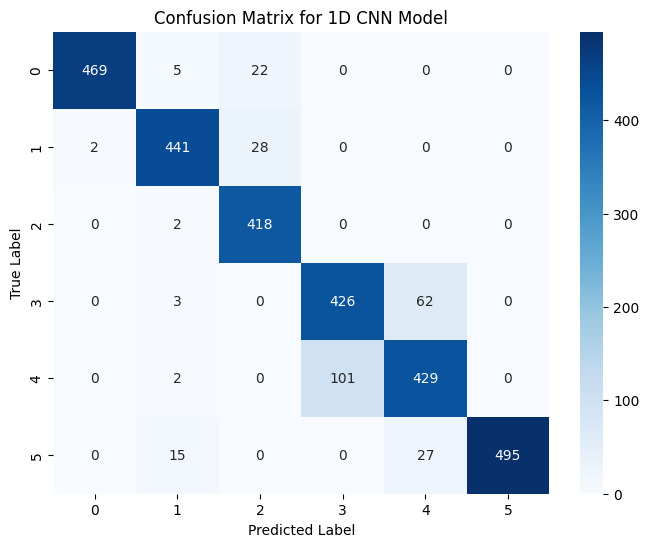

In [ ]:
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for 1D CNN Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##Test Accuracy

In [ ]:
test_loss, test_acc, test_precision, test_recall, test_auc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, AUC: {test_auc:.4f}")

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8643 - auc: 0.9751 - loss: 0.8076 - precision: 0.8663 - recall: 0.8631
Test Accuracy: 90.87%
Precision: 0.9105, Recall: 0.9077, AUC: 0.9783


##Saving the Model

In [ ]:
model.save("cnn_1D_model.keras")

#LSTM + 1D CNN Model

In [ ]:
# Define the hybrid model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(128, 9)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dropout(0.3),
    Dense(6, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 126, 64)             │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 63, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 61, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 30, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,518 (345.77 KB)

 Trainable params: 88,518 (345.77 KB)

 Non-trainable params: 0 (0.00 B)

##Train the Model

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=30, batch_size=32,
                    validation_split=0.2)

Epoch 1/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.5888 - loss: 1.0115 - val_accuracy: 0.8266 - val_loss: 0.5059
Epoch 2/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.8961 - loss: 0.3159 - val_accuracy: 0.8892 - val_loss: 0.3770
Epoch 3/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9422 - loss: 0.1778 - val_accuracy: 0.9035 - val_loss: 0.4034
Epoch 4/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9501 - loss: 0.1415 - val_accuracy: 0.8919 - val_loss: 0.4071
Epoch 5/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9135 - loss: 0.2326 - val_accuracy: 0.8967 - val_loss: 0.3761
Epoch 6/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9570 - loss: 0.1143 - val_accuracy: 0.8919 - val_loss: 0.4256
Epoch 7/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.9482 - loss: 0.1302 - val_accuracy: 0.9028 - val_loss: 0.4186
Epoch 8/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.9531 - loss: 0.1339 - va

##Plotting the training metrics

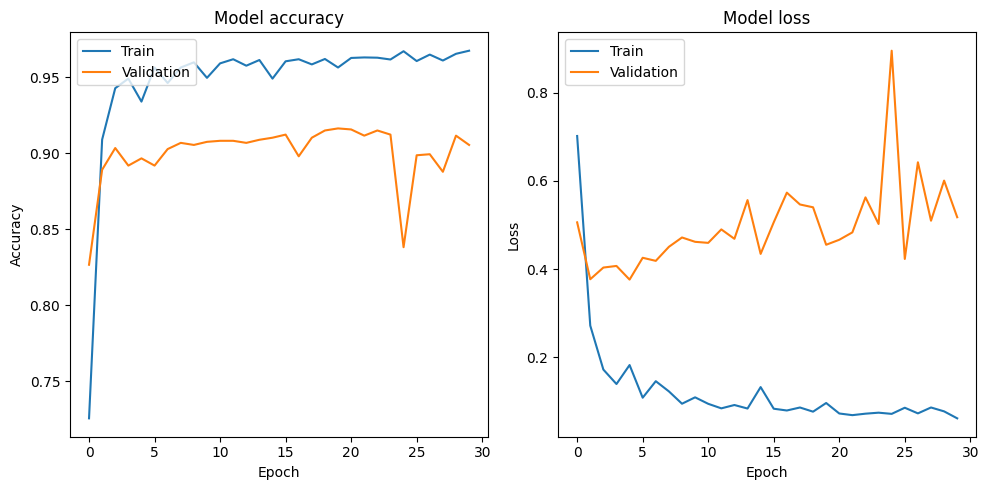

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

##Confusion Metrics

93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


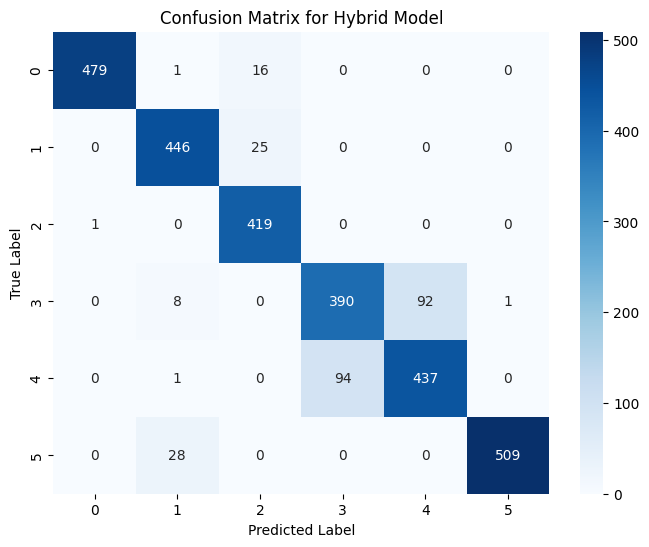

In [ ]:
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Hybrid Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##Test Accuracy

In [ ]:
test = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test[1] * 100:.4f}%")

93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8571 - loss: 0.7342
Test Accuracy: 90.9399%


##Saving the model

In [ ]:
model.save("hybrid.keras")

#Using ML Techniques

##Preprocessing

In [ ]:
# Flatten time-series data from (128, 9) → (1152,)
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # (num_samples, 1152)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Standardize Features
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

# Convert one-hot labels to single-label format
y_train_labels = np.argmax(y_train, axis=1)  # Converts (7352, 6) → (7352,)
y_test_labels = np.argmax(y_test, axis=1)    # Converts (2947, 6) → (2947,)

##Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat, y_train)

y_pred_rf = rf_model.predict(X_test_flat)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81       496
           1       0.94      0.60      0.73       471
           2       0.99      0.62      0.77       420
           3       0.77      0.76      0.76       491
           4       0.84      0.74      0.79       532
           5       1.00      1.00      1.00       537

   micro avg       0.91      0.75      0.82      2947
   macro avg       0.92      0.74      0.81      2947
weighted avg       0.92      0.75      0.82      2947
 samples avg       0.75      0.75      0.75      2947



##SVM

In [ ]:
# Train SVM Model
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train_flat, y_train_labels)

# Predictions
y_pred_svm = svm_model.predict(X_test_flat)

# Evaluate Model
print("SVM Performance:")
print(classification_report(y_test_labels, y_pred_svm))

SVM Performance:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       496
           1       0.97      0.90      0.93       471
           2       0.83      0.96      0.89       420
           3       0.85      0.77      0.81       491
           4       0.82      0.87      0.84       532
           5       1.00      1.00      1.00       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947



##Logistic Regression

In [ ]:
# Train Logistic Regression Model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_flat, y_train_labels)

# Predictions
y_pred_logreg = logreg_model.predict(X_test_flat)

# Evaluate Model
print("Logistic Regression Performance:")
print(classification_report(y_test_labels, y_pred_logreg))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.39      0.23      0.29       496
           1       0.48      0.46      0.47       471
           2       0.40      0.25      0.31       420
           3       0.60      0.76      0.67       491
           4       0.46      0.66      0.54       532
           5       1.00      1.00      1.00       537

    accuracy                           0.58      2947
   macro avg       0.55      0.56      0.55      2947
weighted avg       0.56      0.58      0.56      2947



##Saving the Models

In [ ]:
import joblib
joblib.dump(rf_model, "random_forest.pkl")
joblib.dump(svm_model, "svm_model.pkl")
joblib.dump(logreg_model, "logistic_regression.pkl")

['logistic_regression.pkl']

#Feature Generation using TSFEL

In [ ]:
!pip install tsfel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.5 MB/s eta 0:00:00


##Extracting the features

In [ ]:
import tsfel

# Define file paths
train_path = "UCI HAR Dataset/train/Inertial Signals/"
test_path = "UCI HAR Dataset/test/Inertial Signals/"

# List of signal file names
files = [
    "body_acc_x_train.txt", "body_acc_y_train.txt", "body_acc_z_train.txt",
    "body_gyro_x_train.txt", "body_gyro_y_train.txt", "body_gyro_z_train.txt",
    "total_acc_x_train.txt", "total_acc_y_train.txt", "total_acc_z_train.txt"
]

# Load train datasets into a list
p = [list(np.loadtxt(train_path + file, dtype="float32")) for file in files]

# Load test datasets into a list
q = [list(np.loadtxt(test_path + file.replace("_train", "_test"), dtype="float32")) for file in files]

fs = 100

cfg_file = tsfel.get_features_by_domain()
X_train = [tsfel.time_series_features_extractor(cfg_file, i, fs=fs) for i in p]
X_test = [tsfel.time_series_features_extractor(cfg_file, i, fs=fs) for i in q]

##Training a Random Forest model on extracted features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

classifier = RandomForestClassifier()

y_test = np.loadtxt("UCI HAR Dataset/test/y_test.txt")
y_train = np.loadtxt("UCI HAR Dataset/train/y_train.txt")
activity_labels = np.array(pd.read_csv("UCI HAR Dataset/activity_labels.txt", header=None, delimiter=" "))[:, 1]

sum_acc=0
# Train the classifier
for i in range(9):
  classifier.fit(X_train[i], y_train)

  # Predict test data
  y_test_predict = classifier.predict(X_test[i])

  # Get the classification report
  accuracy = accuracy_score(y_test, y_test_predict) * 100
  print(classification_report(y_test, y_test_predict, target_names=activity_labels))
  sum_acc+=accuracy
  print("Accuracy: " + str(accuracy) + "%")

print("Average Accuracy: " + str(sum_acc/9) + "%")

                    precision    recall  f1-score   support

           WALKING       0.82      0.96      0.89       496
  WALKING_UPSTAIRS       0.78      0.80      0.79       471
WALKING_DOWNSTAIRS       0.91      0.72      0.80       420
           SITTING       0.44      0.36      0.39       491
          STANDING       0.52      0.67      0.59       532
            LAYING       0.73      0.64      0.68       537

          accuracy                           0.69      2947
         macro avg       0.70      0.69      0.69      2947
      weighted avg       0.69      0.69      0.69      2947

Accuracy: 68.81574482524601%
                    precision    recall  f1-score   support

           WALKING       0.73      0.68      0.71       496
  WALKING_UPSTAIRS       0.85      0.73      0.79       471
WALKING_DOWNSTAIRS       0.59      0.73      0.66       420
           SITTING       0.45      0.38      0.41       491
          STANDING       0.56      0.76      0.65       532
       

##Selecting the important features

In [ ]:
from sklearn import preprocessing

nX_train = []
nX_test = []

for i in range(9):
  # Highly correlated features are removed
  corr_features, X_train[i] = tsfel.correlated_features(X_train[i], drop_correlated=True)
  X_test[i].drop(corr_features, axis=1, inplace=True)

  # Remove low variance features
  selector = VarianceThreshold()
  X_train[i] = selector.fit_transform(X_train[i])
  X_test[i] = selector.transform(X_test[i])

  # Normalising Features
  scaler = preprocessing.StandardScaler()
  nX_train.append(scaler.fit_transform(X_train[i]))
  nX_test.append(scaler.transform(X_test[i]))

##Training model on selected features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

classifier = RandomForestClassifier()

y_test = np.loadtxt("UCI HAR Dataset/test/y_test.txt")
y_train = np.loadtxt("UCI HAR Dataset/train/y_train.txt")
activity_labels = np.array(pd.read_csv("UCI HAR Dataset/activity_labels.txt", header=None, delimiter=" "))[:, 1]

sum_acc=0
# Train the classifier
for i in range(9):
  classifier.fit(nX_train[i], y_train)

  # Predict test data
  y_test_predict = classifier.predict(nX_test[i])

  # Get the classification report
  accuracy = accuracy_score(y_test, y_test_predict) * 100
  print(classification_report(y_test, y_test_predict, target_names=activity_labels))
  sum_acc+=accuracy
  print("Accuracy: " + str(accuracy) + "%")

print("Average Accuracy: " + str(sum_acc/9) + "%")

                    precision    recall  f1-score   support

           WALKING       0.82      0.97      0.89       496
  WALKING_UPSTAIRS       0.80      0.81      0.80       471
WALKING_DOWNSTAIRS       0.95      0.73      0.83       420
           SITTING       0.45      0.32      0.37       491
          STANDING       0.50      0.68      0.58       532
            LAYING       0.72      0.66      0.69       537

          accuracy                           0.69      2947
         macro avg       0.71      0.69      0.69      2947
      weighted avg       0.70      0.69      0.69      2947

Accuracy: 69.22293858160842%
                    precision    recall  f1-score   support

           WALKING       0.75      0.79      0.77       496
  WALKING_UPSTAIRS       0.84      0.78      0.81       471
WALKING_DOWNSTAIRS       0.69      0.71      0.70       420
           SITTING       0.49      0.40      0.44       491
          STANDING       0.58      0.74      0.65       532
       

##Training various other types of models on the selected features

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
y_test = np.loadtxt("UCI HAR Dataset/test/y_test.txt")
y_train = np.loadtxt("UCI HAR Dataset/train/y_train.txt")
activity_labels = np.array(pd.read_csv("UCI HAR Dataset/activity_labels.txt", header=None, delimiter=" "))[:, 1]

# Define models
models = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "DNN": MLPClassifier(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier()
}

# Initialize accuracy table
accuracy_table = {model: [] for model in models.keys()}

# Train and evaluate models
for i in range(9):
    for model_name, model in models.items():
        model.fit(nX_train[i], y_train)
        y_test_predict = model.predict(nX_test[i])
        accuracy = accuracy_score(y_test, y_test_predict) * 100
        accuracy_table[model_name].append(accuracy)

# Compute average accuracy
for model_name in models.keys():
    avg_acc = sum(accuracy_table[model_name]) / 9
    accuracy_table[model_name].append(avg_acc)

# Print accuracy table
print("\nAccuracy Table:")
print(pd.DataFrame(accuracy_table, index=[f"Signal {i+1}" for i in range(9)] + ["Average Accuracy"]))


Accuracy Table:
                  RandomForest  LogisticRegression        SVM        DNN  \
Signal 1             69.222939           70.410587  70.749915  65.863590   
Signal 2             65.490329           64.642009  66.779776  58.092976   
Signal 3             63.895487           63.250763  64.065151  57.448252   
Signal 4             71.258907           67.594164  69.494401  62.300645   
Signal 5             63.657957           63.420428  63.216831  57.923312   
Signal 6             67.458432           67.865626  67.865626  62.402443   
Signal 7             82.354937           81.574483  79.843909  80.285036   
Signal 8             74.177129           76.925687  77.061418  74.550390   
Signal 9             69.901595           70.682050  70.919579  66.406515   
Average Accuracy     69.713079           69.596200  69.999623  65.030351   

                  DecisionTree  
Signal 1             61.927384  
Signal 2             52.527995  
Signal 3             51.611809  
Signal 4      

#Training of model on already existing features

##Random Forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier()

x_train = np.loadtxt("UCI HAR Dataset/train/X_train.txt")
x_test = np.loadtxt("UCI HAR Dataset/test/X_test.txt")
y_test = np.loadtxt("UCI HAR Dataset/test/y_test.txt")
y_train = np.loadtxt("UCI HAR Dataset/train/y_train.txt")

model.fit(x_train, y_train)
y_test_predict = model.predict(x_test)

print(classification_report(y_test, y_test_predict))
print(accuracy_score(y_test, y_test_predict))

              precision    recall  f1-score   support

         1.0       0.89      0.98      0.93       496
         2.0       0.90      0.91      0.91       471
         3.0       0.96      0.85      0.91       420
         4.0       0.90      0.88      0.89       491
         5.0       0.90      0.91      0.90       532
         6.0       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.93      0.93      2947

0.9253478113335596
